In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
# Import dataset

baseballcsv = pd.read_csv('2002-2022 MLB Hitting Data.csv')


,last_name,first_name,player_id,year,player_age,b_ab,b_total_hits,b_single,b_double,b_triple,...,xba,xslg,xwoba,xobp,xiso,bacon,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,sprint_speed
0,Abreu,Bobby,NaN,2006,32,548,163,105,41,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alfonzo,Edgardo,NaN,2006,32,87,11,9,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alomar Jr.,Sandy,NaN,2006,40,108,30,21,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alou,Moises,NaN,2006,39,345,104,56,25,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anderson,Garret,NaN,2006,34,543,152,105,28,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,Castillo,Rusney,628329.0,2015,27,273,69,52,10,2,...,0.222,0.319,0.259,0.259,0.097,0.314,88.2,0.9,2.7,27.5
11444,Kang,Jung Ho,628356.0,2015,28,421,121,80,24,2,...,0.280,0.474,0.361,0.349,0.194,0.375,90.5,7.1,9.6,26.7
11445,Tomas,Yasmany,630111.0,2015,24,406,111,80,19,3,...,0.242,0.356,0.280,0.277,0.114,0.374,89.3,5.1,4.0,27.3
11446,Guerrero,Alex,648717.0,2015,28,219,51,30,9,1,...,0.233,0.397,0.287,0.262,0.164,0.311,86.9,14.7,7.9,27.4


In [43]:
# drop player_id column (many blanks) and first and last name columns

baseballcsvdropid = baseballcsv.drop(baseballcsv.columns[[0, 1, 2, 3]], axis=1)


In [44]:
# drop any rows with a blank value in it
baseballfinal = baseballcsvdropid.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)
baseballfinal.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4257 entries, 2223 to 11447
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_age           4257 non-null   int64  
 1   b_ab                 4257 non-null   int64  
 2   b_total_hits         4257 non-null   int64  
 3   b_single             4257 non-null   int64  
 4   b_double             4257 non-null   int64  
 5   b_triple             4257 non-null   int64  
 6   b_home_run           4257 non-null   int64  
 7   b_strikeout          4257 non-null   int64  
 8   b_walk               4257 non-null   int64  
 9   batting_avg          4257 non-null   float64
 10  slg_percent          4257 non-null   float64
 11  on_base_percent      4257 non-null   float64
 12  b_rbi                4257 non-null   int64  
 13  r_total_stolen_base  4257 non-null   int64  
 14  b_swinging_strike    4257 non-null   int64  
 15  xba                  4257 non-null

In [45]:
# summary statistics

baseballfinal.describe().T

,count,mean,std,min,25%,50%,75%,max
player_age,4257.0,28.031947,3.763873,19.000,25.000,28.000,31.000,43.000
b_ab,4257.0,276.637538,178.902220,36.000,115.000,235.000,429.000,681.000
b_total_hits,4257.0,69.944797,50.922048,0.000,25.000,56.000,110.000,216.000
b_single,4257.0,44.792577,33.023068,0.000,17.000,36.000,69.000,170.000
b_double,4257.0,13.941273,10.923621,0.000,5.000,11.000,22.000,58.000
b_triple,4257.0,1.341555,1.816110,0.000,0.000,1.000,2.000,15.000
b_home_run,4257.0,9.869392,9.779853,0.000,2.000,7.000,14.000,62.000
b_strikeout,4257.0,66.975335,42.247415,3.000,31.000,58.000,97.000,219.000
b_walk,4257.0,26.122622,21.804594,0.000,9.000,20.000,38.000,145.000
batting_avg,4257.0,0.236554,0.049018,0.000,0.211,0.244,0.269,0.400


In [46]:
# train and test data
X = baseballfinal.drop(['b_home_run'], axis=1)
y = baseballfinal['b_home_run']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

X_train.shape, X_test.shape

((2852, 24), (1405, 24))

In [47]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators = 200,random_state=0)


In [48]:
# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score (all variables included)

from sklearn.metrics import accuracy_score

print('Model accuracy score with 200 decision-trees : {0:.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 200 decision-trees : 0.2662


In [49]:
# find most important features for the best model

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

# table of features by importance

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

b_rbi                  0.070116
slg_percent            0.068820
xiso                   0.064239
barrel_batted_rate     0.058963
b_swinging_strike      0.053792
b_ab                   0.046057
b_strikeout            0.045263
xslg                   0.044456
launch_angle_avg       0.040763
b_walk                 0.038226
batting_avg            0.037957
exit_velocity_avg      0.037887
b_total_hits           0.037687
xwoba                  0.036855
bacon                  0.036654
xobp                   0.036531
on_base_percent        0.036010
xba                    0.035377
sprint_speed           0.035323
b_single               0.033252
b_double               0.032049
player_age             0.030784
r_total_stolen_base    0.023728
b_triple               0.019215
dtype: float64

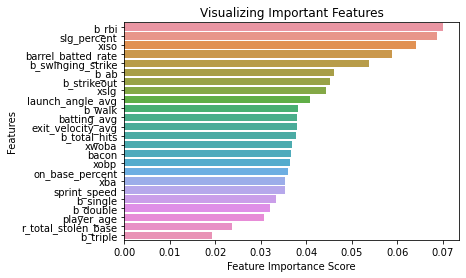

In [50]:
# Graph the most importance features

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [81]:
# drop unimportant features
# declare feature vector and target variable

x2 = baseballfinal.drop(baseballfinal.columns.difference(['b_rbi','slg_percent','xiso','barrel_batted_rate']), axis = 1)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size = 0.33, random_state = 40)

In [89]:
clff = RandomForestClassifier(random_state=0)



# fit the model to the training set

clff.fit(X_train, y_train)


# Predict on the test set results

y_pred2 = clff.predict(X_test)



# Check accuracy score 

print('Model accuracy score with insignificant variables removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with insignificant variables removed : 0.2235


In [90]:
# confusion matrix to assess model performance (false positives, false negatives)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred2)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[90 29  6 ...  0  0  0]
 [20 47 32 ...  0  0  0]
 [ 3 34 33 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]]


In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       127
           1       0.37      0.41      0.39       114
           2       0.28      0.31      0.29       107
           3       0.16      0.21      0.18        77
           4       0.20      0.16      0.18        77
           5       0.20      0.21      0.20        81
           6       0.18      0.15      0.17        71
           7       0.17      0.21      0.19        52
           8       0.18      0.19      0.19        53
           9       0.33      0.24      0.28        58
          10       0.00      0.00      0.00        44
          11       0.13      0.16      0.14        43
          12       0.18      0.11      0.14        53
          13       0.08      0.12      0.09        34
          14       0.12      0.15      0.13        39
          15       0.19      0.13      0.15        31
          16       0.05      0.07      0.06        28
          17       0.05    

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/share